# AMOCarray demo

The purpose of this notebook is to demonstrate the functionality of `AMOCarray`.

The demo is organised to show

- Step 1: Loading and plotting a sample dataset

- Step 2: Exploring the dataset attributes and variables.

Note that when you submit a pull request, you should `clear all outputs` from your python notebook for a cleaner merge.


In [ ]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))

import importlib_resources
import importlib

import xarray as xr
import os
import pooch
from amocarray import readers, writers, plotters, tools, utilities


In [2]:
# Specify the path for writing datafiles
data_path = os.path.join(parent_dir, 'data')

In [3]:
# Load data from data/moc_transports
ds = readers.load_sample_dataset()
type(ds)

xarray.core.dataset.Dataset

In [4]:
plotters.show_contents(ds)

information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
moc_mar_hc10,time,Sv,,,float64
t_aiw10,time,Sv,,,float64
t_bw10,time,Sv,,,float64
t_ek10,time,Sv,,,float64
t_gs10,time,Sv,,,float64
t_ld10,time,Sv,,,float64
t_therm10,time,Sv,,,float64
t_ud10,time,Sv,,,float64
t_umo10,time,Sv,,,float64


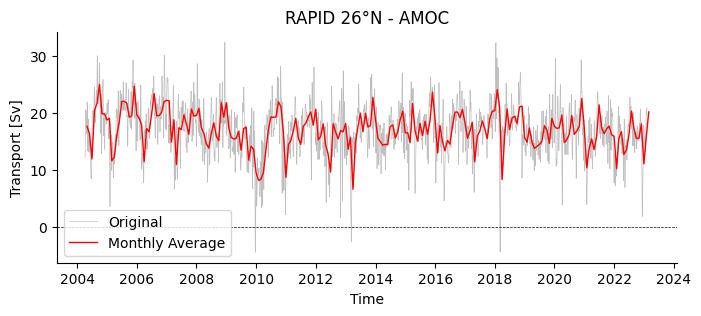

In [5]:
import matplotlib.pyplot as plt

# Resample the dataset to monthly averages
ds_monthly = ds.resample(time='ME').mean()

# Initialize the figure and axes with a specific figure size
fig, axes = plt.subplots(figsize=(8, 3))

# Plot the original dataset in thin grey
plt.plot(ds['time'], ds['moc_mar_hc10'], color='grey', alpha=0.5, linewidth=0.5, label='Original')

# Plot the monthly averaged dataset in thick red
plt.plot(ds_monthly['time'], ds_monthly['moc_mar_hc10'], color='red', linewidth=1, label='Monthly Average')

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Customize the axes
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Add title and labels
plt.title('RAPID 26°N - AMOC')
plt.xlabel('Time')
plt.ylabel('Transport [Sv]')
plt.legend()



In [ ]:
importlib.reload(readers)
datasets = readers.read_26N()


In [13]:
datasets[1]

<xarray.Dataset> Size: 480MB
Dimensions:          (time: 13779, depth: 242)
Coordinates:
  * time             (time) datetime64[ns] 110kB 2004-04-02 ... 2023-02-11
Dimensions without coordinates: depth
Data variables: (12/19)
    pressure         (depth) float64 2kB ...
    TG_west          (depth, time) float64 27MB ...
    SG_west          (depth, time) float64 27MB ...
    TG_wb3           (depth, time) float64 27MB ...
    SG_wb3           (depth, time) float64 27MB ...
    TG_east          (depth, time) float64 27MB ...
    ...               ...
    TG_east_flag     (depth, time) float64 27MB ...
    SG_east_flag     (depth, time) float64 27MB ...
    TG_marwest_flag  (depth, time) float64 27MB ...
    SG_marwest_flag  (depth, time) float64 27MB ...
    TG_mareast_flag  (depth, time) float64 27MB ...
    SG_mareast_flag  (depth, time) float64 27MB ...
Attributes:
    Title:                         RAPID streamfunction
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/
    Acknowledgement:               The RAPID 26N AMOC monitoring project is f...
    Created_by:                    Ben Moat
    Creation_date:                 17-Sep-2024
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/223b34a32dc5c945e0637086abc0f...

In [ ]:
importlib.reload(utilities)
datasets16 = readers.read_16N("https://mooring.ucsd.edu/move/nc/", "OS_MOVE_TRANSPORTS.nc")

syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ HTML PUBLIC "-//IETF//DTD HTML 2.0//EN"><html><head><title>404 Not Found</title></head><body><h1>Not Found</h1><p>The requested URL was not found on this server.</p></body></html>


OSError: [Errno -90] NetCDF: file not found: 'https://mooring.ucsd.edu/move/nc/OS_MOVE_TRANSPORTS.nc'